In [6]:
import pandas as pd
import numpy as np

# Load the dataset
data_path = 'S:/ML Course/Capstone 2/laptop_price.csv'
laptop_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
laptop_data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
# Define a list of potential placeholders for missing values
missing_placeholders = ["n/a", "na", "none", "--", "?", ""]

# Check for missing values and placeholders
missing_values_extended = laptop_data.replace(missing_placeholders, np.nan).isnull().sum()
missing_values_extended[missing_values_extended > 0]

Series([], dtype: int64)

In [8]:
# Check the data types of each column
data_types = laptop_data.dtypes

# Get a statistical summary of the numerical columns
statistical_summary = laptop_data.describe()

# Check for missing values
missing_values = laptop_data.isnull().sum()

data_types, statistical_summary, missing_values

(laptop_ID             int64
 Company              object
 Product              object
 TypeName             object
 Inches              float64
 ScreenResolution     object
 Cpu                  object
 Ram                  object
 Memory               object
 Gpu                  object
 OpSys                object
 Weight               object
 Price_euros         float64
 dtype: object,
          laptop_ID       Inches  Price_euros
 count  1303.000000  1303.000000  1303.000000
 mean    660.155794    15.017191  1123.686992
 std     381.172104     1.426304   699.009043
 min       1.000000    10.100000   174.000000
 25%     331.500000    14.000000   599.000000
 50%     659.000000    15.600000   977.000000
 75%     990.500000    15.600000  1487.880000
 max    1320.000000    18.400000  6099.000000,
 laptop_ID           0
 Company             0
 Product             0
 TypeName            0
 Inches              0
 ScreenResolution    0
 Cpu                 0
 Ram                 0
 Memory 

In [9]:
# Remove non-numeric characters and convert to numeric
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype(int)
laptop_data['Weight'] = laptop_data['Weight'].str.replace('kg', '').astype(float)

# Confirm the changes
laptop_data[['Ram', 'Weight']].dtypes

Ram         int32
Weight    float64
dtype: object

In [10]:
# Select only the numeric columns for the correlation matrix
numeric_columns = laptop_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Correlation of features with 'Price_euros'
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)

print(price_correlations)

Price_euros    1.000000
Ram            0.743007
Weight         0.210370
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64


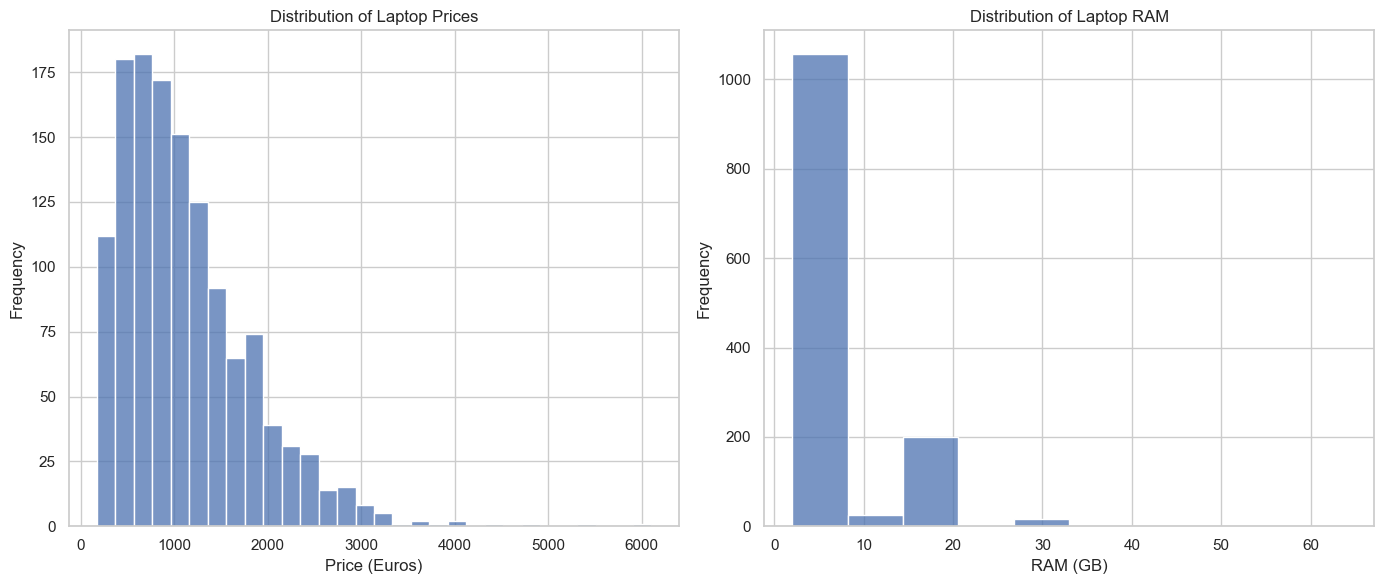

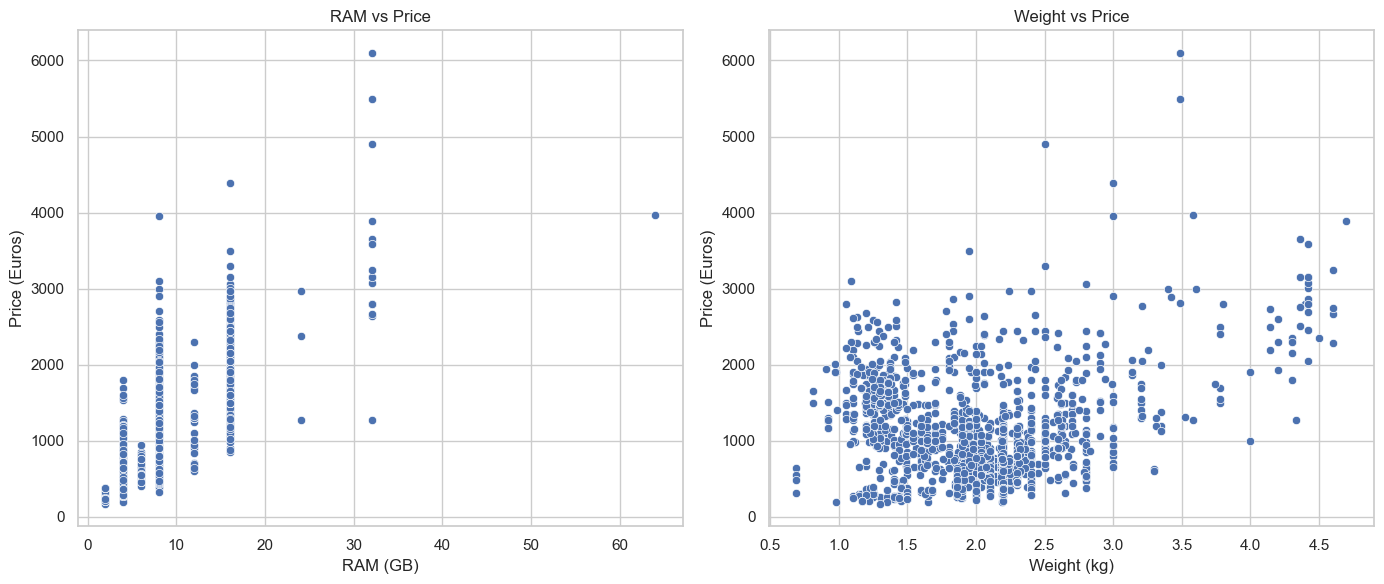

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for the distribution of prices and RAM
plt.figure(figsize=(14, 6))

# Histogram for Price distribution
plt.subplot(1, 2, 1)
sns.histplot(laptop_data['Price_euros'], kde=False, bins=30)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

# Histogram for RAM distribution
plt.subplot(1, 2, 2)
sns.histplot(laptop_data['Ram'], kde=False, bins=10)
plt.title('Distribution of Laptop RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Creating scatter plots for the relationship between RAM and price, and weight and price
plt.figure(figsize=(14, 6))

# Scatter plot for RAM vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(x='Ram', y='Price_euros', data=laptop_data)
plt.title('RAM vs Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euros)')

# Scatter plot for Weight vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight', y='Price_euros', data=laptop_data)
plt.title('Weight vs Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euros)')

# Show the plots
plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading the dataset
file_path = 'S:/ML Course/Capstone 2/laptop_price.csv'
laptop_data = pd.read_csv(file_path)

# Preprocessing: Encoding categorical variables
categorical_cols = laptop_data.select_dtypes(include=['object']).columns
numeric_cols = laptop_data.select_dtypes(include=['number']).columns.drop('Price_euros')

# Creating a Column Transformer for OneHotEncoding
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Splitting the data into features and target
X = laptop_data.drop('Price_euros', axis=1)
y = laptop_data['Price_euros']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the transformations
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)

# Predicting and evaluating the model
y_pred = lr_model.predict(X_test_transformed)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(103513.41657271476, 0.7962039556407352)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = 'S:/ML Course/Capstone 2/laptop_price.csv'
laptop_data = pd.read_csv(file_path)

# Preprocessing: Encoding categorical variables
categorical_cols = laptop_data.select_dtypes(include=['object']).columns
numeric_cols = laptop_data.select_dtypes(include=['number']).columns.drop('Price_euros')

# Creating a Column Transformer for OneHotEncoding
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Splitting the data into features and target
X = laptop_data.drop('Price_euros', axis=1)
y = laptop_data['Price_euros']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the transformations
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define a more extensive grid of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV with the Random Forest Regressor and the parameter grid
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fitting the grid search
grid_search.fit(X_train_transformed, y_train)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the Random Forest Regressor with the best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train_transformed, y_train)

# Predicting and evaluating the model with the best parameters
y_pred_rf_best = rf_best.predict(X_test_transformed)
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

best_params, best_score, mse_rf_best, r2_rf_best

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


S:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
247 fits failed with the following error:
Traceback (most recent call last):
  File "S:\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "S:\Anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "S:\Anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "S:\Anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

({'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 -89961.94669006404,
 101900.37499209472,
 0.7993796936696936)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

# Reload the dataset
file_path = 'S:/ML Course/Capstone 2/laptop_price.csv'
laptop_data = pd.read_csv(file_path)

# Preprocessing: Encoding categorical variables
categorical_cols = laptop_data.select_dtypes(include=['object']).columns
numeric_cols = laptop_data.select_dtypes(include=['number']).columns.drop('Price_euros')

# Creating a Column Transformer for OneHotEncoding
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Splitting the data into features and target
X = laptop_data.drop('Price_euros', axis=1)
y = laptop_data['Price_euros']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the transformations
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define a grid of hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the GridSearchCV with the XGBRegressor and the parameter grid
grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fitting the grid search
grid_search.fit(X_train_transformed, y_train)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the XGBRegressor with the best parameters
xgb_best = XGBRegressor(**best_params, random_state=42)
xgb_best.fit(X_train_transformed, y_train)

# Predicting and evaluating the model with the best parameters
y_pred_xgb_best = xgb_best.predict(X_test_transformed)
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

best_params, best_score, mse_xgb_best, r2_xgb_best


Fitting 3 folds for each of 243 candidates, totalling 729 fits


({'colsample_bytree': 0.8,
  'learning_rate': 0.2,
  'max_depth': 7,
  'n_estimators': 150,
  'subsample': 0.9},
 -97408.07341197431,
 98125.51348189873,
 0.806811598337255)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

def load_and_preprocess_data(file_path):
    # Load the dataset
    laptop_data = pd.read_csv(file_path)

    # Preprocessing: Encoding categorical variables
    categorical_cols = laptop_data.select_dtypes(include=['object']).columns
    column_transformer = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

    # Splitting the data into features and target
    X = laptop_data.drop('Price_euros', axis=1)
    y = laptop_data['Price_euros']
    return column_transformer, X, y

def perform_grid_search(X_train, y_train):
    # Define a grid of hyperparameters to tune
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Initialize GridSearchCV
    grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_

def main():
    file_path = 'S:/ML Course/Capstone 2/laptop_price.csv'
    column_transformer, X, y = load_and_preprocess_data(file_path)
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Applying the transformations
    X_train_transformed = column_transformer.fit_transform(X_train)
    X_test_transformed = column_transformer.transform(X_test)

    best_params, best_score = perform_grid_search(X_train_transformed, y_train)
    
    # Train and evaluate the model with the best parameters
    xgb_best = XGBRegressor(**best_params, random_state=42)
    xgb_best.fit(X_train_transformed, y_train)
    y_pred_xgb_best = xgb_best.predict(X_test_transformed)
    mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
    r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print("MSE:", mse_xgb_best)
    print("R2 Score:", r2_xgb_best)

if __name__ == "__main__":
    main()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.9}
Best Score: -97408.07341197431
MSE: 98125.51348189873
R2 Score: 0.806811598337255
